<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-letadylka-prochazka-belohlavek/blob/main/LatitudeLongitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx

In [10]:
import re
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
char_points = '/content/drive/My Drive/CHARACTERISTIC_POINTS.txt'

coordinates_text = []
k = 0
amount_to_read = 100
coordinate_pattern = r'\d{6}[NS]\d{7}[EW]'
with open(char_points, 'r') as f:
    for line in f:
      matches = re.findall(coordinate_pattern, line)
      if matches != []:
        coordinates_text.append(matches[0])
        k += 1
      if k >= amount_to_read:
        break

number_of_points = len(coordinates_text)
print(number_of_points)

100


In [13]:
print(coordinates_text)

['491004N0163011E', '490805N0165303E', '501524N0124306E', '500855N0130649E', '493607N0175732E', '494703N0181512E', '500227N0140127E', '501144N0140349E', '501039N0142846E', '500024N0142729E', '501224N0142812E', '501141N0143208E', '501025N0144213E', '490647N0173003E', '500812N0143903E', '501716N0143233E', '501244N0143548E', '501521N0140952E', '500753N0145319E', '500954N0144146E', '501402N0143849E', '501040N0143725E', '500936N0144332E', '501220N0142736E', '501432N0143043E', '501804N0142735E', '502601N0140816E', '501717N0150722E', '500511N0125711E', '490323N0164911E', '490228N0165935E', '490147N0170706E', '490825N0162521E', '490952N0162236E', '490735N0155414E', '491915N0160435E', '492306N0155244E', '490927N0155023E', '491033N0162118E', '490511N0155916E', '495721N0153258E', '494312N0154725E', '493652N0153949E', '494452N0152008E', '495832N0153118E', '494209N0154609E', '493854N0153358E', '500110N0153230E', '500026N0155609E', '500059N0153831E', '495730N0153816E', '495658N0155458E', '495646N016

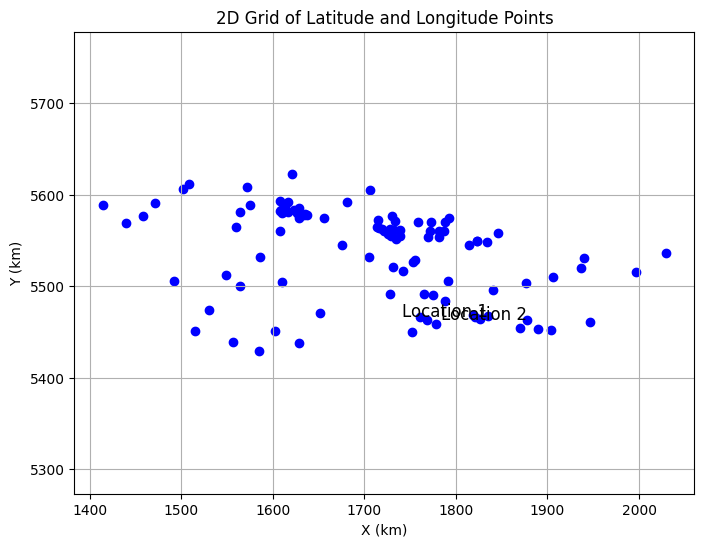

In [15]:
import math
import re

# Constants for Earth's radius (in kilometers)
EARTH_RADIUS = 6371  # Radius in kilometers

def dms_to_decimal(dms_str):
    # Regex pattern to extract DMS values
    pattern = r'(\d{2,3})(\d{2})(\d{2})([NSEW])'
    match = re.match(pattern, dms_str)

    if not match:
        raise ValueError(f"Invalid DMS format: {dms_str}")

    degrees = int(match.group(1))
    minutes = int(match.group(2))
    seconds = int(match.group(3))
    direction = match.group(4)

    # Convert DMS to decimal degrees
    decimal_degrees = degrees + minutes / 60 + seconds / 3600

    # Apply the direction (negative for S and W)
    if direction in 'SW':
        decimal_degrees = -decimal_degrees

    return decimal_degrees

def latlon_to_xy(coords, lat_origin=0, lon_origin=0):
    xy_coords = []

    for coord in coords:
        lat_dms = coord[:7]  # First 7 characters for latitude
        lon_dms = coord[7:]  # Remaining characters for longitude

        lat = dms_to_decimal(lat_dms)
        lon = dms_to_decimal(lon_dms)

        # Convert latitude and longitude to radians
        lat_rad = math.radians(lat)
        lon_rad = math.radians(lon)
        lat_origin_rad = math.radians(lat_origin)
        lon_origin_rad = math.radians(lon_origin)

        # Apply equirectangular projection
        x = EARTH_RADIUS * (lon_rad - lon_origin_rad) * math.cos(lat_origin_rad)
        y = EARTH_RADIUS * (lat_rad - lat_origin_rad)

        xy_coords.append((x, y))

    return xy_coords


def plot_coordinates(xy_coords, labels):
    plt.figure(figsize=(8, 6))

    # Extract x and y coordinates
    x_vals = [coord[0] for coord in xy_coords]
    y_vals = [coord[1] for coord in xy_coords]

    # Create the scatter plot
    plt.scatter(x_vals, y_vals, color='blue', marker='o')

    # Annotate each point with its label
    for i, label in enumerate(labels):
        plt.text(x_vals[i], y_vals[i], label, fontsize=12, ha='right')

    # Add labels and grid
    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.title("2D Grid of Latitude and Longitude Points")
    plt.grid(True)
    plt.axis('equal')  # Ensure x and y axis have equal scaling

    # Show plot
    plt.show()

# Converting the coordinates to 2D grid
xy_points = latlon_to_xy(coordinates_text)

labels = ["Location 1", "Location 2"]

# Plot the points
plot_coordinates(xy_points, labels)
